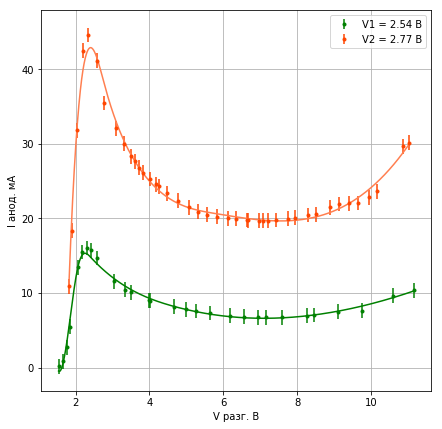

In [22]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import mlab
from scipy import interpolate
from math import* 
import warnings
warnings.filterwarnings('ignore')

# Парсинг данных.
data = pd.read_table('measurements.txt', sep = '\s+' )
data2 = pd.read_table('measurements2.txt', sep = '\s+' )
I = data['I(B)']
errIk1 = [1]*29
errIk2 = [1]*42
V = data['V(B)']
I2 = data2['I(B)']
V2 = data2['V(B)']

# Тут я просто делаю сплайн по исходным данным.
xlist1 = mlab.frange(V[0],V[28],0.005)
tck1 = interpolate.splrep(V, I, s=7, k = 3) 
yder1 = interpolate.splev(xlist1, tck1, der=0) 
# Тут я просто делаю сплайн по исходным данным.
xlist2 = mlab.frange(V2[0],V2[41],0.005)
tck2 = interpolate.splrep(V2, I2, s=30 , k = 3) 
yder2 = interpolate.splev(xlist2, tck2, der=0) 

#Визуализация исходных данных.
plt.figure(figsize= (7,7)) 
plt.errorbar(V, I, yerr = errIk1, fmt='.',label='V1 = 2.54 B', color = 'green')  
plt.errorbar(V2, I2, yerr = errIk2, fmt='.',label='V2 = 2.77 B', color = 'orangered') 
plt.xlabel("V разг. В")
plt.ylabel("I анод. мА")
plt.plot(xlist1,yder1,color = "green")
plt.plot(xlist2,yder2,color = 'coral')
plt.grid()
plt.legend();



1.0
1.0


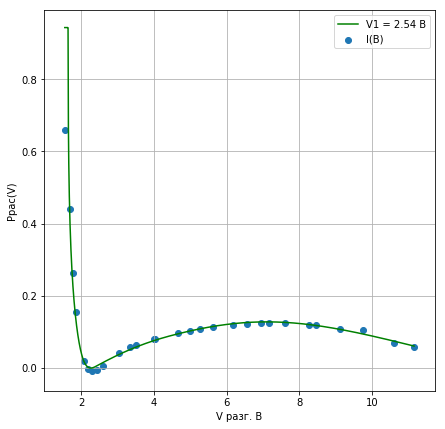

In [23]:
#Тут переменные, которые я еще не отнормировал и не привел к распределению вероятности.
# p1 и p2 можно привести к виду распределения вероятности. ( Для отрисовки самих кривых)
p1 = yder1.copy()
p2 = yder2.copy()
# e1 и e2 можно привести к виду распределения вероятности. ( Для отрисовки точек)
e1 = I.copy()
e2 = I2.copy()

# h1 и h2 коэффициенты для нормировке кривой плотности вероятности по высоте.
# s1 и s2 для выполнения условия нормировки (S = 1)

#Cначала просто без нормировки используем формулу из лабника.

for i in range(p1.size):
    elem = 0.031 # просто любое маленькое число, которое гарантирует, что я не буду брать lg от отрицательной величины.
    if yder1[i]>0:
        elem = yder1[i]   
    p1[i] =(-1*log(elem))
   
for i in range(p2.size):
    elem = fabs(yder2[i])   
    p2[i] =(-1*log(elem))

h1 = - min(p1) # так как min(p1) получилось < 0 мне нужно поднять мой график вверх на эту величину.
h2 = -min(p2)

# теперь посчитаем площадь методом прямоугольников под полученными кривыми, которые отнормированны только по высоте.
s1 = 0
s2 = 0

#Поднимаем кривые 

for i in range(p1.size):
    elem = 0.031 # просто любое маленькое число, которое гарантирует, что я не буду брать lg от отрицательной величины.
    if yder1[i]>0:
        elem = yder1[i]   
    p1[i] =(-1*log(elem)+h1)
   
for i in range(p2.size):
    elem = fabs(yder2[i])   
    p2[i] =(-1*log(elem)+h2)

# считаю площадь под графиками.
for i in range(p1.size):
    s1 += p1[i]*0.005    
    
for i in range(p2.size):
    s2 += p2[i]*0.005 

#Осталось только окончательно отнормировать. (для точек e1 и e2 тоже)

for i in range(p1.size):
    elem = 0.031 
    if yder1[i]>0:
        elem = yder1[i]   
    p1[i] =(-1*log(elem)+h1)/s1
   
for i in range(p2.size):
    elem = fabs(yder2[i])   
    p2[i] =(-1*log(elem)+h2)/s2


for i in range(e1.size):
    elem = I[i]   
    e1[i] =(-1*log(elem)+h1)/s1
    
for i in range(e2.size):
    elem = fabs(I2[i])   
    e2[i] =(-1*log(elem)+h2)/s2 

# тут просто проверим что площадь под графиками стала = 1    
integral1 = 0
integral2 = 0

for i in range(p1.size):
    integral1 += p1[i]*0.005    
    
for i in range(p2.size):
    integral2 += p2[i]*0.005    

print(integral1.round())
print(integral2.round())
    
plt.figure(figsize= (7,7)) 
plt.plot(xlist1,p1,color = "green",label='V1 = 2.54 B')
plt.scatter(V,e1)
plt.xlabel("V разг. В")
plt.ylabel("Pрас(V)")
plt.grid()
plt.legend();   
 

<Figure size 504x504 with 0 Axes>

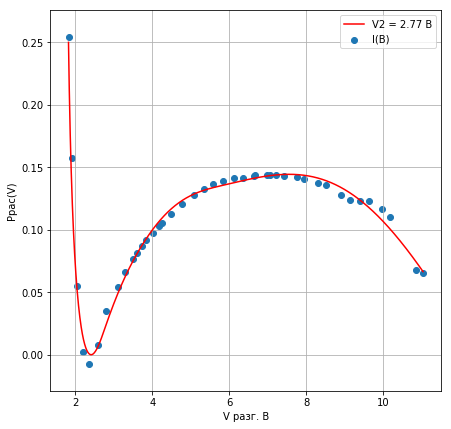

In [24]:
plt.figure(figsize= (7,7))
plt.figure(figsize= (7,7)) 
plt.scatter(V2,e2)
plt.plot(xlist2,p2,color = "red",label='V2 = 2.77 B')
plt.xlabel("V разг. В")
plt.ylabel("Pрас(V)")
plt.grid()
plt.legend(); 